### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# Import all libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# The series 'car' has 12576 null values out of 12684 entires. 
# List the value counts of the non-null values
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [7]:
data.drop_duplicates(['car', 'Y'])

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
2604,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
2606,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
3092,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,1
3094,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
7305,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,0
7306,No Urgent Place,Friend(s),Sunny,80,10AM,Restaurant(<20),1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,1


In [8]:
##### Check if any of these categories have an unique distribution
##### Note Jupyter prints only one output per cell, so each line has to be executed separately 
##### after uncommenting it

##### data.query('car == "Scooter and motorcycle"')['Y']
##### data.query('car == "Mazda5"')['Y']
##### data.query('car == "do not drive"')['Y']
##### data.query('car == "crossover"')['Y']
##### data.query('car == "Car that is too old to install Onstar :D"')['Y']

In [9]:
# it seems reasonable to drop the series 'car', 99.1% of entries are null. 
# There is no significant distribution for the non-null values

data = data.loc[:, data.columns != 'car']

In [10]:
# Now the dataframe have 794 null values out of 12684 entries. (6.3% of rows) across 5 columns
# Inspect the values in the remaining columns with null values
# See if the the null counts in these columns can affect these significantly
other_na_columns = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for col in other_na_columns:
    print(data[col].value_counts())

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [11]:
# The above shows that null values in these columns have no real way of impacting the analysis
# It is reasonable to drop these null rows.
# Alternate is to fill some reasonable computed values; try that for future work
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [12]:
# Now data has 12079 entries across 25 columns, with no null entries
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [13]:
# check and drop any duplicate entries
data[data.duplicated() == True]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [14]:
# The above showed there are 72 duplicate entries. Drop them
data.drop_duplicates(keep='first', inplace=True)
data.info()
# Now the dataframe has 12007 entires and 25 columns

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



Proportion of Coupons Accepted =  0.5684


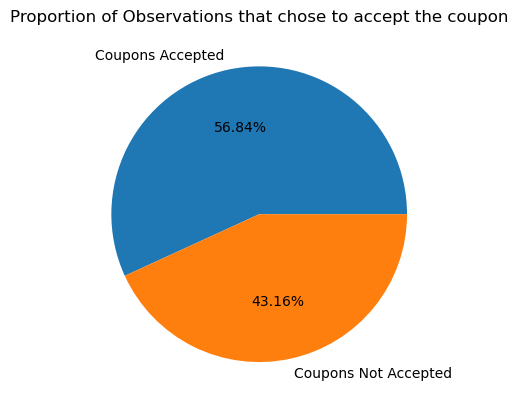

In [15]:
# This is the number of rows with Y == 1
# Round off the print to 4 decimal digits. And use 2 decimal digits for pie chart
coupons_accepted = data.query('Y == 1').value_counts().sum() / data.shape[0]
coupons_not_accepted = 1 - coupons_accepted
print ("Proportion of Coupons Accepted = ", round(coupons_accepted, 4))

# Represent this with a pie chart
plt.pie([coupons_accepted, coupons_not_accepted], labels=['Coupons Accepted', 'Coupons Not Accepted'], autopct='%1.2f%%')
plt.title('Proportion of Observations that chose to accept the coupon')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

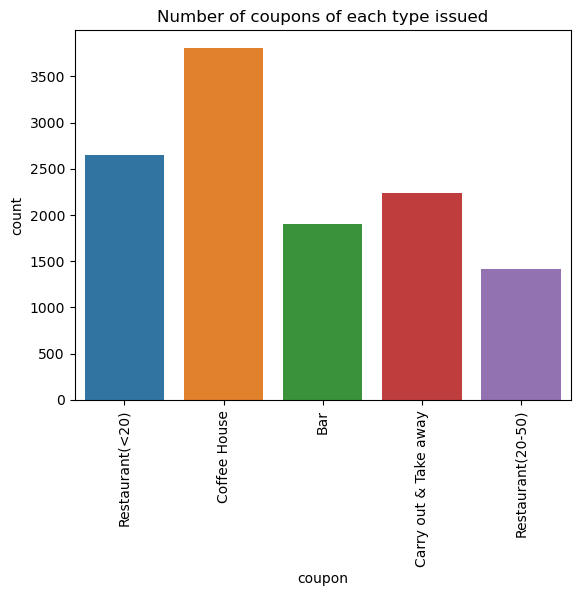

In [16]:
# Use Seaborn count plot to show the number of coupons of each type
# Rotate the x axis labels so that they dont overlap
sns.countplot(data=data, x='coupon')
plt.title('Number of coupons of each type issued')
plt.xticks(rotation = 90)
plt.show()

6. Use a histogram to visualize the temperature column.

C:\Users\rvarada\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Temperature at the time of coupon issue')

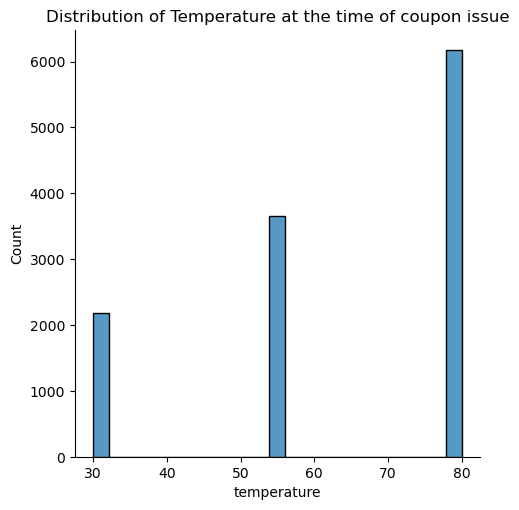

In [17]:
# Use seaborn histogram to plot this
sns.displot(data=data, x='temperature')
plt.title('Distribution of Temperature at the time of coupon issue')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
df_barcoupons = data[data['coupon'] == 'Bar']
df_barcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null   obj

2. What proportion of bar coupons were accepted?


Proportion of Bar Coupons Accepted =  0.4119


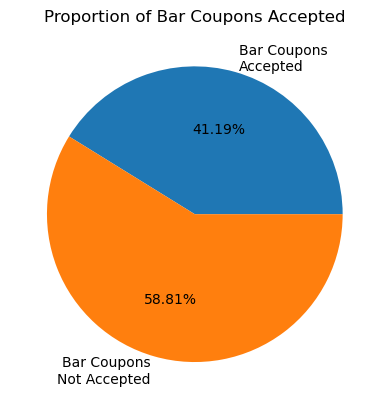

In [19]:
# This is the number of rows with Y == 1 in df_barcoupons
bar_coupons_accepted = df_barcoupons.query('Y == 1').value_counts().sum() / df_barcoupons.shape[0]
bar_coupons_not_accepted = 1 - bar_coupons_accepted
print ("Proportion of Bar Coupons Accepted = ", round(bar_coupons_accepted, 4))

# Represent this with a pie chart
plt.pie([bar_coupons_accepted, bar_coupons_not_accepted], labels=['Bar Coupons\nAccepted', 'Bar Coupons\nNot Accepted'], autopct='%1.2f%%')
plt.title('Proportion of Bar Coupons Accepted')
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
print(data['Bar'].value_counts())

Bar
never    4916
less1    3351
1~3      2365
4~8      1049
gt8       326
Name: count, dtype: int64


1906    Total Bar Coupons issued
1713    Bar Coupons received by those who went to Bar three or fewer times
638     Bar Coupons accepted by those who went to Bar three or fewer times
37.24   Percentage of Bar Coupons accepted by those who went to Bar three or fewer times against bar coupons
           issued to those who went to Bar three or fewer times
33.47   Percentage of Bar Coupons accepted by those who went to Bar three or fewer times against total bar coupons issued

1906    Total Bar Coupons issued
193     Bar Coupons received by those who went to Bar four or more times
147     Bar Coupons accepted by those who went to Bar four or more times
76.17   Percentage of Bar Coupons accepted by those who went to Bar four or more times against bar coupons
           issued to those who went to Bar four or more times
7.71    Percentage of Bar Coupons accepted by those who went to Bar four or more times against total bar coupons issued



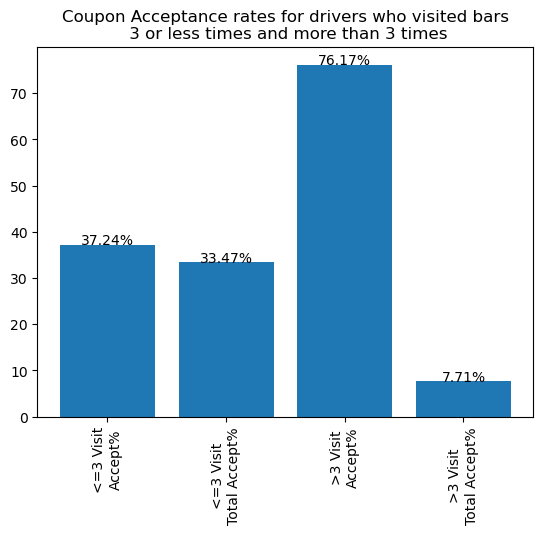

In [21]:
# "went to a bar 3 or fewer times a month" will include "never", "less1" and "1~3"
# Compute the Accept% w.r.t bar coupons issued, and w.r.t the total coupons issued

TotalBarCoupons = df_barcoupons.shape[0]

lte3Coupons = (df_barcoupons['Bar'].isin(['never', 'less1', '1~3'])).sum()
lte3Accept = ((df_barcoupons['Bar'].isin(['never', 'less1', '1~3'])) & (df_barcoupons['Y'] == 1 )).sum()
lte3AcceptPercent =  (lte3Accept / lte3Coupons)*100
lte3TotalAcceptPercent =  (lte3Accept / TotalBarCoupons)*100

print(TotalBarCoupons,"   Total Bar Coupons issued")
print(lte3Coupons, "   Bar Coupons received by those who went to Bar three or fewer times")
print(lte3Accept, "    Bar Coupons accepted by those who went to Bar three or fewer times")
print(round(lte3AcceptPercent, 2), "  Percentage of Bar Coupons accepted by those who went to Bar three or fewer times against bar coupons")
print("           issued to those who went to Bar three or fewer times")
print(round(lte3TotalAcceptPercent, 2), "  Percentage of Bar Coupons accepted by those who went to Bar three or fewer times against total bar coupons issued\n")

# "went more" will include "4~8" and "gt8"

gt3Coupons = (df_barcoupons['Bar'].isin(['4~8', 'gt8'])).sum()
gt3Accept = ((df_barcoupons['Bar'].isin(['4~8', 'gt8'])) & (df_barcoupons['Y'] == 1 ) == True).sum()
gt3AcceptPercent =  (gt3Accept / gt3Coupons)*100
gt3TotalAcceptPercent =  (gt3Accept / TotalBarCoupons)*100

print(TotalBarCoupons,"   Total Bar Coupons issued")
print(gt3Coupons, "    Bar Coupons received by those who went to Bar four or more times")
print(gt3Accept, "    Bar Coupons accepted by those who went to Bar four or more times")
print(round(gt3AcceptPercent, 2), "  Percentage of Bar Coupons accepted by those who went to Bar four or more times against bar coupons")
print("           issued to those who went to Bar four or more times")
print(round(gt3TotalAcceptPercent, 2), "   Percentage of Bar Coupons accepted by those who went to Bar four or more times against total bar coupons issued\n")

plotdata = [round(lte3AcceptPercent, 2), round(lte3TotalAcceptPercent, 2), round(gt3AcceptPercent, 2), round(gt3TotalAcceptPercent, 2)]
plotlabels = ['<=3 Visit\nAccept%', '<=3 Visit\nTotal Accept%', '>3 Visit\nAccept%', '>3 Visit\nTotal Accept%',]
plt.bar(plotlabels, plotdata)
plt.xticks(rotation = 90)
for i in range(len(plotdata)):
    plt.text(i, plotdata[i], str(plotdata[i])+"%", ha='center')
plt.title('Coupon Acceptance rates for drivers who visited bars\n 3 or less times and more than 3 times')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
# List age of drivers
df_barcoupons['age'].value_counts()

age
21         397
26         368
31         321
50plus     273
36         196
41         171
46          99
below21     81
Name: count, dtype: int64

1906    Total Bar Coupons issued
14.59   Accept rate of Bar Coupons accepted by those who went to Bar more than once a month
           and are over the age of 25 against total bar coupons issued
85.41   Accept rate of Bar Coupons by all others
The Accept rate of all others is 5.9 times higher


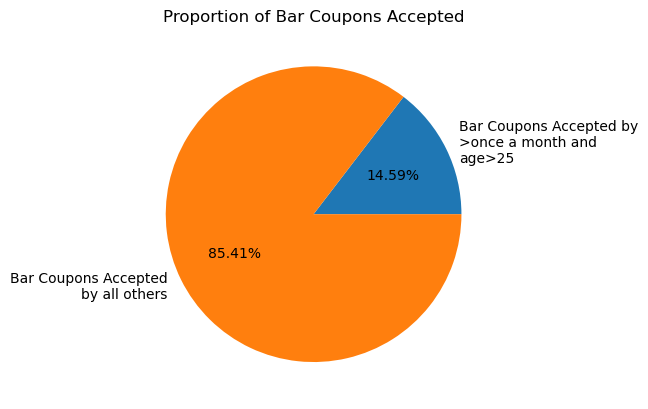

In [23]:
# "Over the age of 25" includes 26, 31, 50plus, 36, 41, 46
# "more than once a month" "1~3", "4-8", gt8

mt1Accept = ((df_barcoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
              (df_barcoupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])) &
              (df_barcoupons['Y'] == 1 )).sum()
mt1AcceptPercent =  (mt1Accept / TotalBarCoupons)*100

# Acceptance rate of all others is 100 - acceptance rate above
othersAcceptPercent = 100 - mt1AcceptPercent

print(TotalBarCoupons,"   Total Bar Coupons issued")
print(round(mt1AcceptPercent, 2), "  Accept rate of Bar Coupons accepted by those who went to Bar more than once a month")
print("           and are over the age of 25 against total bar coupons issued")
print(round(othersAcceptPercent, 2), "  Accept rate of Bar Coupons by all others")
print('The Accept rate of all others is 5.9 times higher')

# Represent this with a pie chart
plt.pie([round(mt1AcceptPercent, 2), round(othersAcceptPercent, 2)], labels=['Bar Coupons Accepted by\n>once a month and\nage>25', 'Bar Coupons Accepted\nby all others'], autopct='%1.2f%%')
plt.title('Proportion of Bar Coupons Accepted')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
# List the values & counts in 'passanger'
df_barcoupons['passanger'].value_counts()

passanger
Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: count, dtype: int64

In [25]:
# List the values & counts in 'occupation'
df_barcoupons['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      222
Sales & Related                              175
Education&Training&Library                   125
Management                                   104
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [26]:
Qn5Accept = ((df_barcoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
             (df_barcoupons['passanger']!='Kid(s)') &
             (df_barcoupons['occupation']!='Farming Fishing & Forestry') &
             (df_barcoupons['Y'] == 1 )).sum()

Qn5AcceptPercent =  (lte3Accept / TotalBarCoupons)*100
print(TotalBarCoupons,"   Total Bar Coupons issued")
print(round(Qn5AcceptPercent, 2), "  Percentage of Bar Coupons accepted Per condition in Qn 5")

# # the qn is confusing. If the intend is to compare between 3 accept rates
# mt1Accept = ((((df_barcoupons['Bar']=='1~3') | (df_barcoupons['Bar']=='4~8') | (df_barcoupons['Bar']=='gt8')) & 
#              (df_barcoupons['Y'] == 1 )).sum()) * 100 / TotalBarCoupons
# NotkidAccept = (((df_barcoupons['passanger']!='Kid(s)') & (df_barcoupons['Y'] == 1 )).sum()) * 100 / TotalBarCoupons
# NotFAccept = (((df_barcoupons['occupation']!='Farming Fishing & Forestry') & (df_barcoupons['Y'] == 1 )).sum()) * 100 / TotalBarCoupons
# print(TotalBarCoupons,"   Total Bar Coupons issued")
# print(round(mt1Accept, 2), "  Percentage of Bar Coupons accepted >1 per month visitors")
# print(round(NotkidAccept, 2), "  Percentage of Bar Coupons accepted when passenger was not kid")
# print(round(NotFAccept, 2), "  Percentage of Bar Coupons accepted when passenger was not in Farming Fishing & Forestry")
# # The results
# 1906    Total Bar Coupons issued
# 20.57   Percentage of Bar Coupons accepted >1 per month visitors
# 39.09   Percentage of Bar Coupons accepted when passenger was not kid
# 40.98   Percentage of Bar Coupons accepted when passenger was not in Farming Fishing & Forestry

1906    Total Bar Coupons issued
33.47   Percentage of Bar Coupons accepted Per condition in Qn 5


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5143
4~8      3424
less1    1983
gt8      1282
never     175
Name: count, dtype: int64

In [28]:
data['income'].value_counts()

income
$25000 - $37499     1912
$12500 - $24999     1722
$37500 - $49999     1680
$100000 or More     1673
$50000 - $62499     1561
Less than $12500    1006
$62500 - $74999      837
$75000 - $87499      813
$87500 - $99999      803
Name: count, dtype: int64

In [29]:
# The question does not clearly state whether the comparison is with respect to the total coupons issued
# or, with the total bar coupons issued. 
# Since the previous questions are in the context of total bar coupons, I will assume the same for this question
# The code change needed to use total coupons is similar. Replace TotalBarCoupons with TotalCoupons and 
# replace df_barcoupons dataframe with data dataframe. 

# go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
Qn6_1Accept = ((df_barcoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
               (df_barcoupons['passanger']!='Kid(s)') &
               (df_barcoupons['maritalStatus']!='widowed') &
               (df_barcoupons['Y'] == 1 )).sum()

# go to bars more than once a month and are under the age of 30 *OR*
Qn6_2Accept = ((df_barcoupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                ((df_barcoupons['age']=='below21') | (df_barcoupons['age']=='21') | (df_barcoupons['age']=='26')) &
               (df_barcoupons['Y'] == 1 )).sum()

# go to cheap restaurants more than 4 times a month and income is less than 50K. 
Qn6_3Accept = ((df_barcoupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
                (df_barcoupons['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                (df_barcoupons['Y'] == 1 )).sum()

Qn6_1AcceptPercent =  (Qn6_1Accept / TotalBarCoupons) * 100
Qn6_2AcceptPercent =  (Qn6_2Accept / TotalBarCoupons) * 100
Qn6_3AcceptPercent =  (Qn6_3Accept / TotalBarCoupons) * 100

print(TotalBarCoupons,"   Total Bar Coupons issued")
print(round(Qn6_1AcceptPercent, 2), "  Percentage of Bar Coupons accepted Per condition 1 in Qn 6")
print(round(Qn6_2AcceptPercent, 2), "  Percentage of Bar Coupons accepted Per condition 2 in Qn 6")
print(round(Qn6_3AcceptPercent, 2), "    Percentage of Bar Coupons accepted Per condition 3 in Qn 6")


1906    Total Bar Coupons issued
19.73   Percentage of Bar Coupons accepted Per condition 1 in Qn 6
12.38   Percentage of Bar Coupons accepted Per condition 2 in Qn 6
6.3     Percentage of Bar Coupons accepted Per condition 3 in Qn 6


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [30]:
# Get the Accept rate for each of the categories standalone 
print("## Bar Visit --------------\n")
print(((df_barcoupons['Bar']=='never') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['Bar']=='less1') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['Bar']=='1~3') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['Bar']=='4~8') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['Bar']=='gt8') & (df_barcoupons['Y'] == 1 )).sum())

print("## Age --------------\n")
print(((df_barcoupons['age']=='below21') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='21') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='26') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='31') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='36') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='41') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='46') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['age']=='50plus') & (df_barcoupons['Y'] == 1 )).sum())

print("## Company you keep--------------\n")
print(((df_barcoupons['passanger']=='Alone') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['passanger']=='Friend(s)') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['passanger']=='Partner') & (df_barcoupons['Y'] == 1 )).sum())
print(((df_barcoupons['passanger']=='Kid(s)') & (df_barcoupons['Y'] == 1 )).sum())


## Bar Visit --------------

149
244
245
114
33
## Age --------------

34
200
179
121
60
75
36
80
## Company you keep--------------

466
179
100
40


Based on all the analysis on bar coupons done above, my hypotheses and recommendation are as follows:

a. The bar coupon acceptance rate (at 76.17%) is best amongst the drivers who frequent the bars more than one times a month. 

b. Factoring among three most common vectors (Age, Company you keep and Presence of Kids), the most number of coupon accepts are in the following groups

      i. drivers that are with friends

     ii. drivers who frequent the bars more than one to three times a month
     
    iii. drivers who frequent the bars more than four to eight times a month

More coupons should be issued to these demographics to improve the coupon acceptance rate.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
# My independent investigation is on the following question: 
# Determine which drivers accept the coupon to the value restaurants and the expensive restaurants based on their age and income
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

In [32]:
data['age'].value_counts()

age
21         2526
26         2388
31         1906
50plus     1725
36         1251
41         1061
46          648
below21     502
Name: count, dtype: int64

In [33]:
data['income'].value_counts()

income
$25000 - $37499     1912
$12500 - $24999     1722
$37500 - $49999     1680
$100000 or More     1673
$50000 - $62499     1561
Less than $12500    1006
$62500 - $74999      837
$75000 - $87499      813
$87500 - $99999      803
Name: count, dtype: int64

In [34]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5143
4~8      3424
less1    1983
gt8      1282
never     175
Name: count, dtype: int64

In [35]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    5825
1~3      3178
never    2056
4~8       684
gt8       264
Name: count, dtype: int64

In [36]:
# Create df with age, income r<20, marital status and Y columns from data 
df_r20 = data[(data['coupon']=='Restaurant(<20)')][['age', 'income', 'RestaurantLessThan20', 'maritalStatus', 'Y']]
df_r20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 22 to 12678
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   2646 non-null   object
 1   income                2646 non-null   object
 2   RestaurantLessThan20  2646 non-null   object
 3   maritalStatus         2646 non-null   object
 4   Y                     2646 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 124.0+ KB


415    Coupons offered to Age <= 25
237    Coupons accepted by Age <= 25
57.11  Percentage Coupon Accepted by drivers Age <= 25

984    Coupons offered to Age > 25
783    Coupons accepted  Age > 25
79.57  Percentage Coupon Accepted by drivers Age > 25


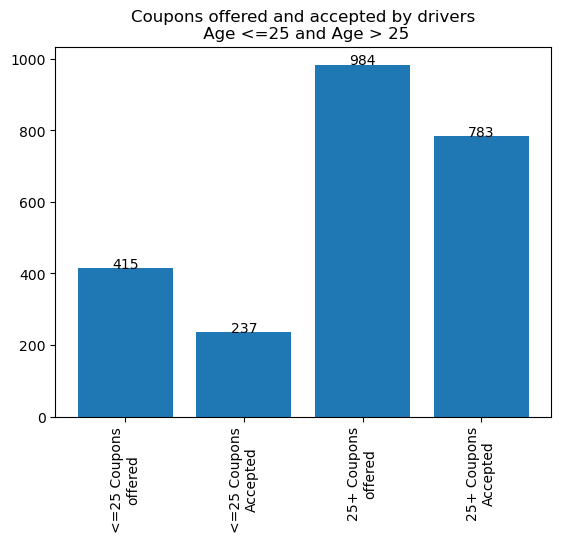

In [37]:
# Determine drivers acceptance of coupon to value restaurants and the expensive restaurants 
# based on their age, income and marital status

# 1. go to restaurants more than once a month, age <=25 and age > 25, income < 50,000

# Coupons offered for drivers age <= 25 with income < $50,000
Qn1Coupons25 = (((df_r20['age'] == 'below21') | (df_r20['age'] == '21')) &
                ((df_r20['income'] == 'Less than $12500') | (df_r20['income'] == '$12500 - $24999') | (df_r20['income'] == '$25000 - $37499') | (df_r20['income'] == '$37500 - $49999'))).sum()
# Coupons aceepted by drivers age <=25 and income < $50,000 who visit restaurants at least once a month
Qn1Accept25 = (((df_r20['RestaurantLessThan20'] != 'never') & (df_r20['RestaurantLessThan20'] != 'less1')) &
                ((df_r20['age'] == 'below21') | (df_r20['age'] == '21')) &
                ((df_r20['income'] == 'Less than $12500') | (df_r20['income'] == '$12500 - $24999') | (df_r20['income'] == '$25000 - $37499') | (df_r20['income'] == '$37500 - $49999')) &
                (df_r20['Y'] == 1)).sum()
# Coupons offered for drivers age > 25 with income < $50,000
Qn1Coupons25plus = (((df_r20['age'] != 'below21') & (df_r20['age'] != '21')) &
                ((df_r20['income'] == 'Less than $12500') | (df_r20['income'] == '$12500 - $24999') | (df_r20['income'] == '$25000 - $37499') | (df_r20['income'] == '$37500 - $49999'))).sum()

# Coupons aceepted by drivers age >=25 and income < $50,000 who visit restaurants at least once a month
Qn1Accept25plus = (((df_r20['RestaurantLessThan20'] != 'never') & (df_r20['RestaurantLessThan20'] != 'less1')) &
                ((df_r20['age'] != 'below21') | (df_r20['age'] != '21')) &
                ((df_r20['income'] == 'Less than $12500') | (df_r20['income'] == '$12500 - $24999') | (df_r20['income'] == '$25000 - $37499') | (df_r20['income'] == '$37500 - $49999')) &
                (df_r20['Y'] == 1)).sum()

# Coupons offered for drivers age <= 25 with income < $50,000
Qn1Coupons25 = (((df_r20['age'] == 'below21') | (df_r20['age'] == '21')) &
                (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))).sum()
# Coupons aceepted by drivers age <=25 and income < $50,000 who visit restaurants at least once a month
Qn1Accept25 = (((df_r20['RestaurantLessThan20'] != 'never') & (df_r20['RestaurantLessThan20'] != 'less1')) &
                ((df_r20['age'] == 'below21') | (df_r20['age'] == '21')) &
                (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                (df_r20['Y'] == 1)).sum()
# Coupons offered for drivers age > 25 with income < $50,000
Qn1Coupons25plus = (((df_r20['age'] != 'below21') & (df_r20['age'] != '21')) &
                (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))).sum()

# Coupons aceepted by drivers age >=25 and income < $50,000 who visit restaurants at least once a month
Qn1Accept25plus = (((df_r20['RestaurantLessThan20'] != 'never') & (df_r20['RestaurantLessThan20'] != 'less1')) &
                ((df_r20['age'] != 'below21') | (df_r20['age'] != '21')) &
                (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                (df_r20['Y'] == 1)).sum()

print(Qn1Coupons25, "   Coupons offered to Age <= 25")
print(Qn1Accept25, "   Coupons accepted by Age <= 25")
print(round((Qn1Accept25*100/Qn1Coupons25), 2), " Percentage Coupon Accepted by drivers Age <= 25\n")

print(Qn1Coupons25plus, "   Coupons offered to Age > 25")
print(Qn1Accept25plus, "   Coupons accepted  Age > 25")
print(round((Qn1Accept25plus*100/Qn1Coupons25plus), 2), " Percentage Coupon Accepted by drivers Age > 25")

plotr20data = [Qn1Coupons25, Qn1Accept25, Qn1Coupons25plus, Qn1Accept25plus]
plotr20labels = ['<=25 Coupons\noffered', '<=25 Coupons\nAccepted', '25+ Coupons\noffered', '25+ Coupons\nAccepted']
plt.bar(plotr20labels, plotr20data)
plt.xticks(rotation = 90)
for i in range(len(plotr20data)):
    plt.text(i, plotr20data[i], str(plotr20data[i]), ha='center')
plt.title('Coupons offered and accepted by drivers\n Age <=25 and Age > 25')
plt.show()

2646   Total coupons issued for Restaurant<20
1878   Total coupons accepted for Restaurant<20
Percentage coupons accepted by drivers with income <$50,000
0.18   Single
0.09   Married
0.1    Others
Percentage coupons accepted by drivers with income =>$50,000
0.1    Single
0.19   Married
0.05   Others


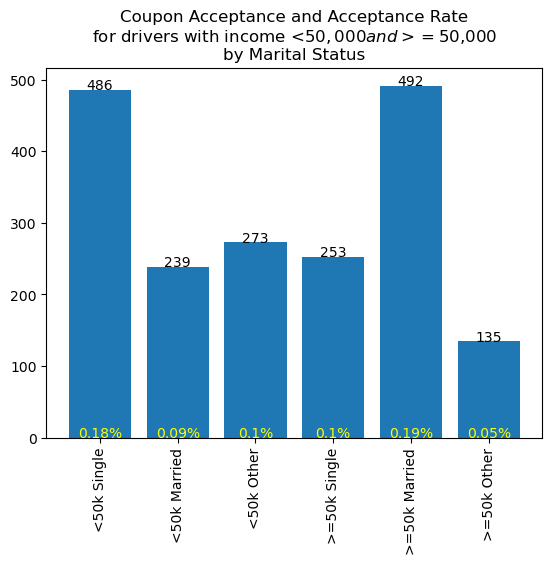

In [40]:
# Determine drivers acceptance of coupon to value restaurants and the expensive restaurants based on their age & income
# 2. go to restaurants based on marital status (Single, Married, other) and  income < 50,000 and income => 50,000

Qn2Coupons50kSingle = ((df_r20['maritalStatus'] == 'Single') & 
                       (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                       (df_r20['Y'] == 1)).sum()

Qn2Coupons50kMarried = ((df_r20['maritalStatus'] == 'Married partner') & 
                        (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                        (df_r20['Y'] == 1)).sum()

Qn2Coupons50kOther = ((df_r20['maritalStatus'].isin(['Unmarried partner', 'Divorced', 'Widowed'])) & 
                      (df_r20['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
                      (df_r20['Y'] == 1)).sum()

Qn2Coupons50kplusSingle = ((df_r20['maritalStatus'] == 'Single') & 
                           (df_r20['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])) &
                           (df_r20['Y'] == 1)).sum()

Qn2Coupons50kplusMarried = ((df_r20['maritalStatus'] == 'Married partner') & 
                           (df_r20['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])) &
                           (df_r20['Y'] == 1)).sum()

Qn2Coupons50kplusOther = ((df_r20['maritalStatus'].isin(['Unmarried partner', 'Divorced', 'Widowed'])) & 
                           (df_r20['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])) &
                           (df_r20['Y'] == 1)).sum()

r20Coupons = len(df_r20)
r20CouponsAccepted = (df_r20['Y'] == 1).sum()

c50ks = round(Qn2Coupons50kSingle/r20Coupons, 2)
c50km = round(Qn2Coupons50kMarried/r20Coupons, 2)
c50ko = round(Qn2Coupons50kOther/r20Coupons, 2)
c50kps = round(Qn2Coupons50kplusSingle/r20Coupons, 2)
c50kpm = round(Qn2Coupons50kplusMarried/r20Coupons, 2)
c50kpo = round(Qn2Coupons50kplusOther/r20Coupons, 2)

#print(r20Coupons, r20CouponsAccepted)
#print(Qn2Coupons50kSingle, Qn2Coupons50kMarried, Qn2Coupons50kOther, Qn2Coupons50kplusSingle, Qn2Coupons50kplusMarried, Qn2Coupons50kplusOther)
#print(c50ks, c50km, c50ko, c50kps, c50kpm, c50kpo)

print(r20Coupons, "  Total coupons issued for Restaurant<20")
print(r20CouponsAccepted, "  Total coupons accepted for Restaurant<20")
print("Percentage coupons accepted by drivers with income <$50,000")
print(c50ks, "  Single")
print(c50km, "  Married")
print(c50ko,"   Others")
print("Percentage coupons accepted by drivers with income =>$50,000")
print(c50kps, "   Single")
print(c50kpm, "  Married")
print(c50kpo,"  Others")

plotm1data = [Qn2Coupons50kSingle, Qn2Coupons50kMarried, Qn2Coupons50kOther, Qn2Coupons50kplusSingle, Qn2Coupons50kplusMarried, Qn2Coupons50kplusOther]
plotm2data = [c50ks, c50km, c50ko, c50kps, c50kpm, c50kpo]
plotmlabels = ['<50k Single', '<50k Married', '<50k Other', '>=50k Single', '>=50k Married', '>=50k Other']
plt.bar(plotmlabels, plotm1data)
plt.xticks(rotation = 90)
for i in range(len(plotm1data)):
    plt.text(i, plotm1data[i], str(plotm1data[i]), ha='center')
    plt.text(i, plotm2data[i], str(plotm2data[i])+"%", ha='center', color='yellow')
plt.title('Coupon Acceptance and Acceptance Rate\nfor drivers with income <$50,000 and >=$50,000\nby Marital Status')
plt.show()
